In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder



sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 14

In [2]:
data = pd.read_csv("../data/customer_churn_dataset-training-master.csv")
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


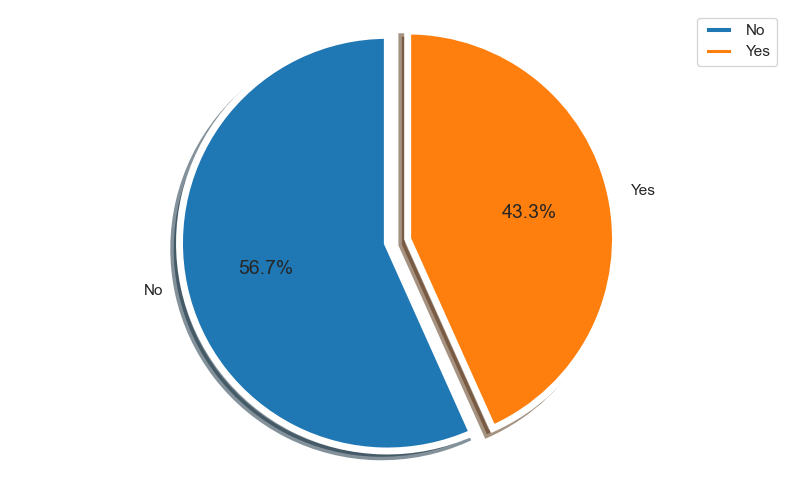

In [7]:
plt.pie(data['Churn'].value_counts(), labels = ['No','Yes'],autopct='%1.1f%%' , explode=[0,0.1] , shadow=True , startangle=90 , colors=['#1f77b4','#ff7f0e'] , wedgeprops={'linewidth': 5})
plt.axis('equal')
plt.legend()
plt.show()

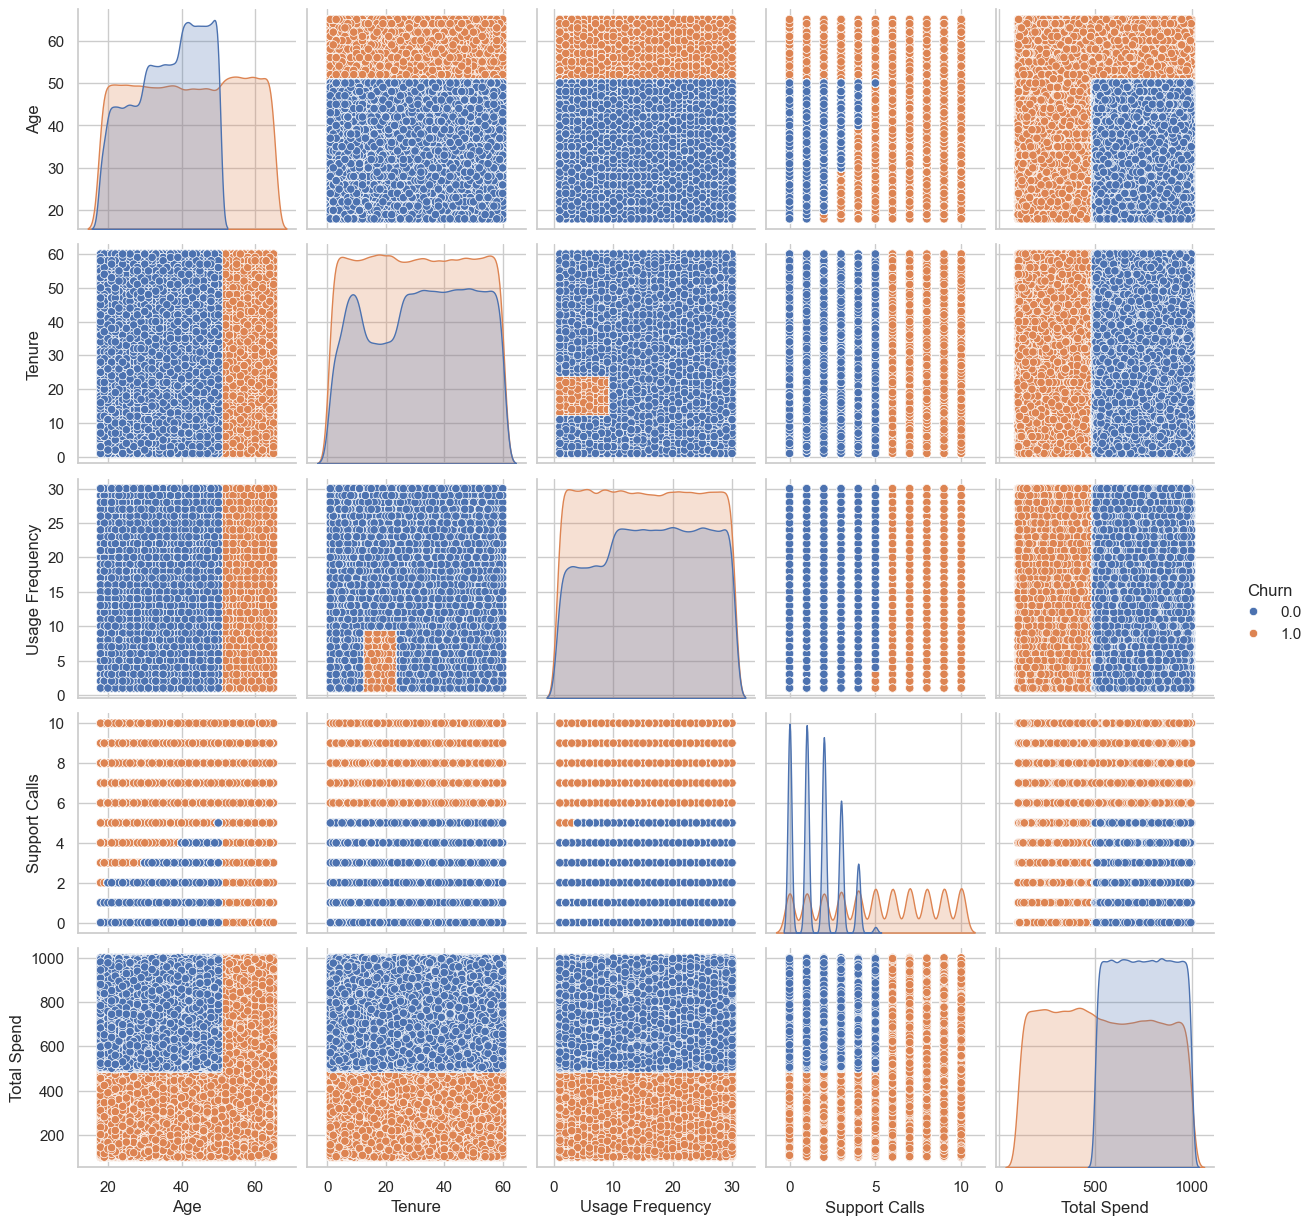

In [8]:
sns.pairplot(data[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Total Spend',"Churn"]], hue='Churn')
plt.show()

In [9]:
def count_plot(data , col):
    sns.countplot(data = data , x = col , hue= 'Churn')
    plt.xlabel(col)
    plt.show()
    print(data[col].value_counts())
    print(data['Churn'].value_counts())


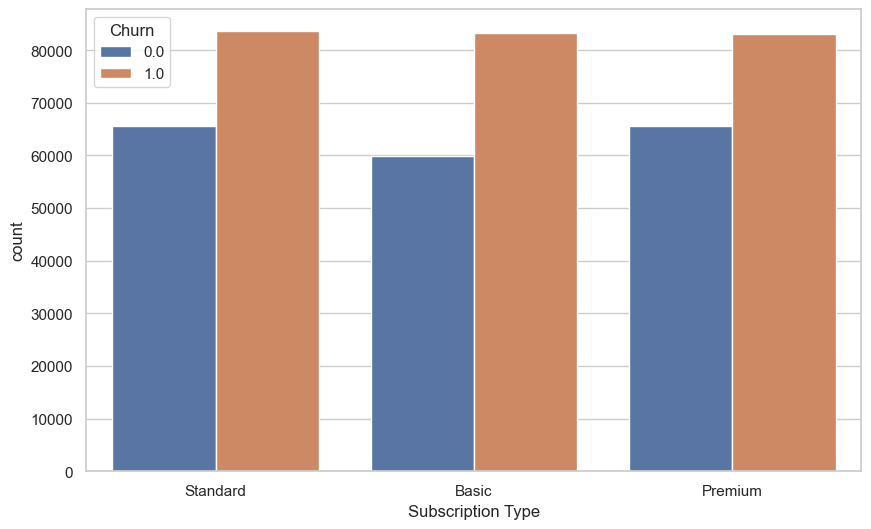

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64
Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


In [10]:
count_plot(data=data , col='Subscription Type')

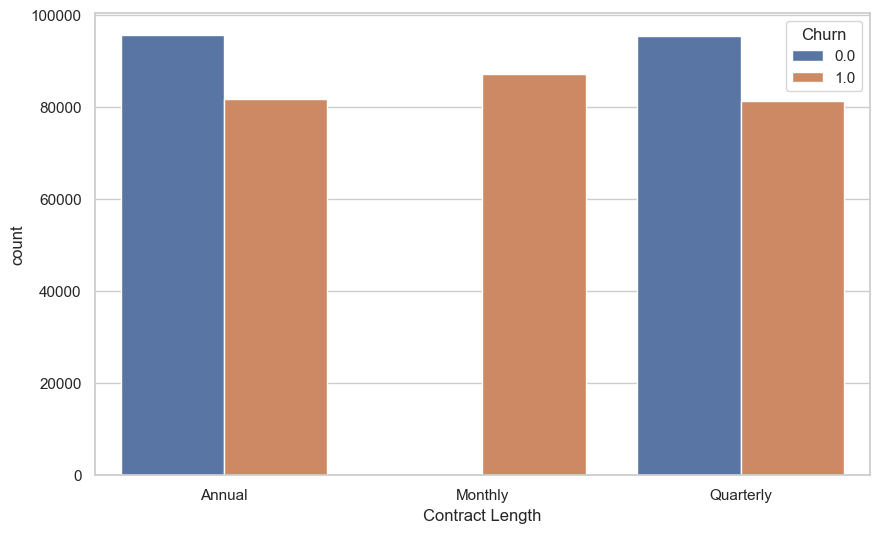

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64
Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


In [11]:
count_plot(data , col='Contract Length')

In [12]:
def type_columns(data):

    categorical_columns = [col for col in data.columns if data[col].dtype == 'O']
    numerical_columns = [col for col in data.columns if data[col].dtype != 'O']

    return categorical_columns , numerical_columns

categorycal_columns , numerical_columns = type_columns(data)

print("numerical_columns is : \n" , numerical_columns)
print("categorycal_columns is : \n " , categorycal_columns)


numerical_columns is : 
 ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
categorycal_columns is : 
  ['Gender', 'Subscription Type', 'Contract Length']


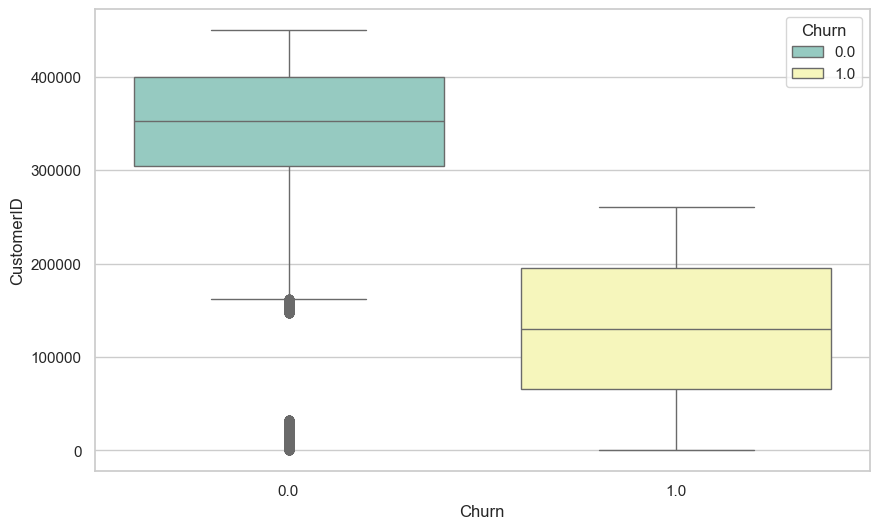

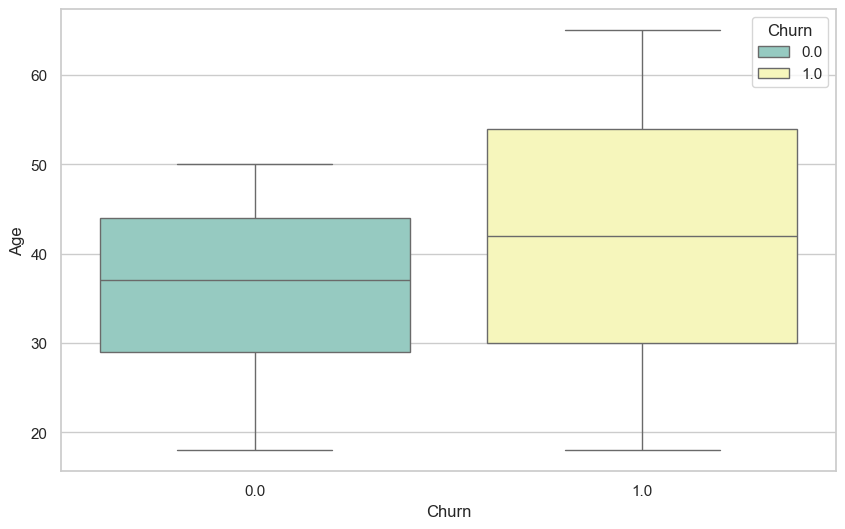

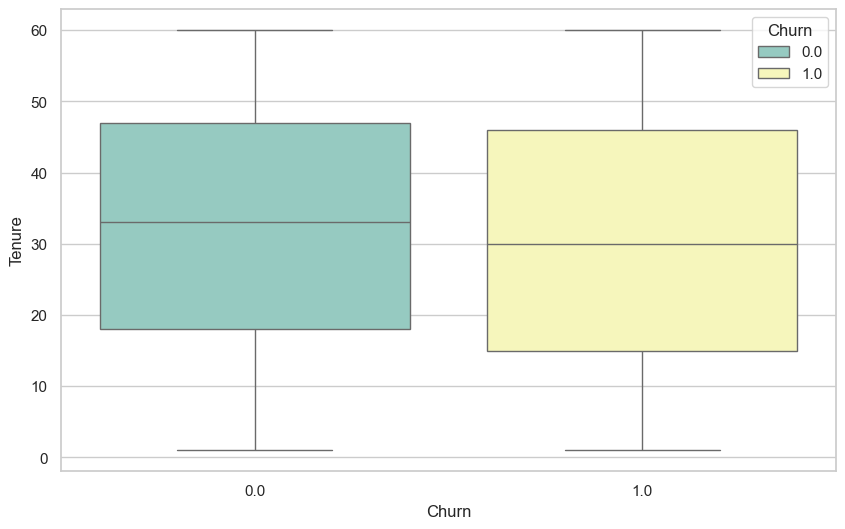

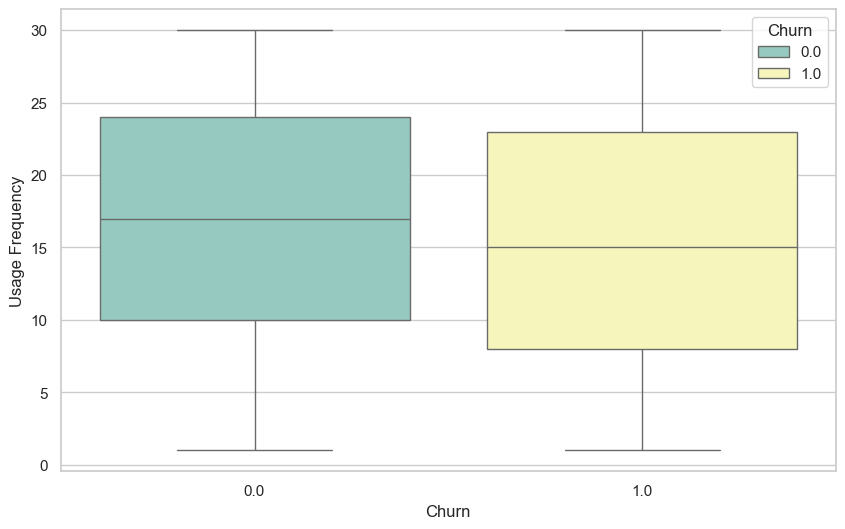

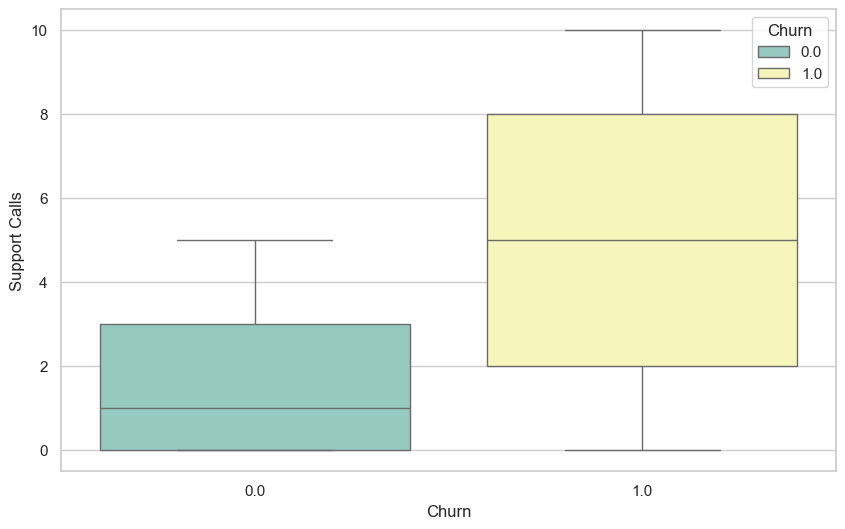

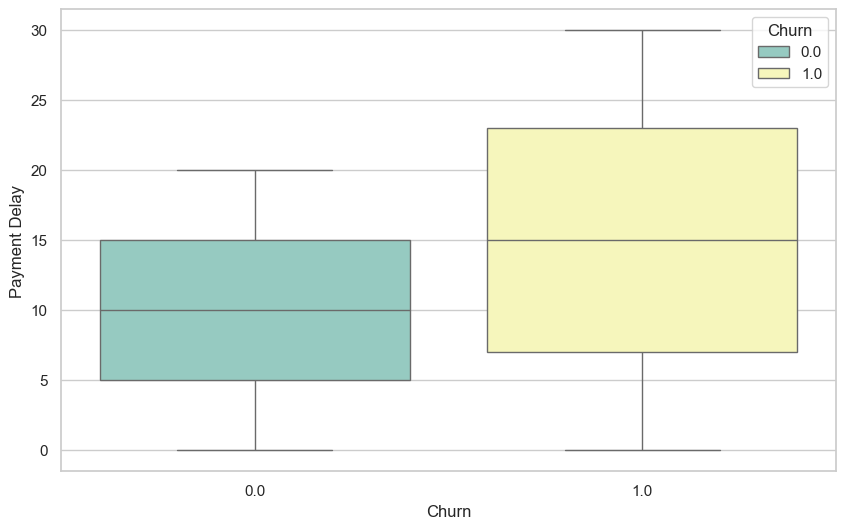

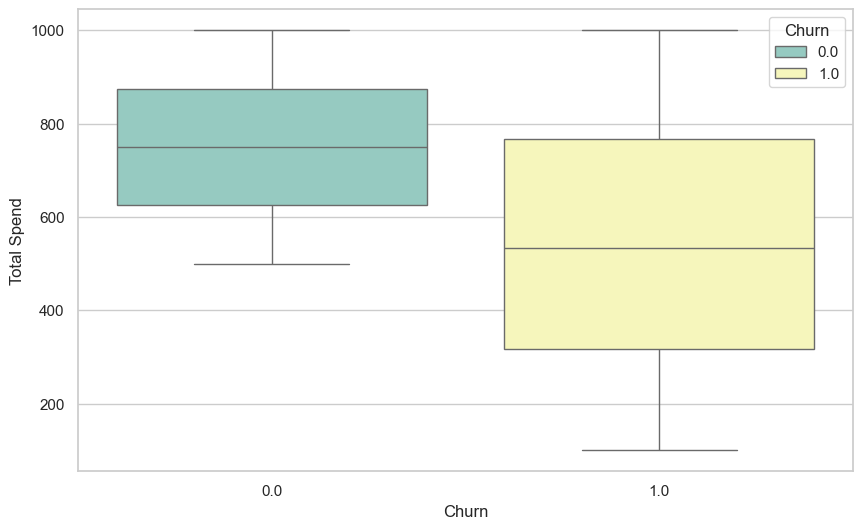

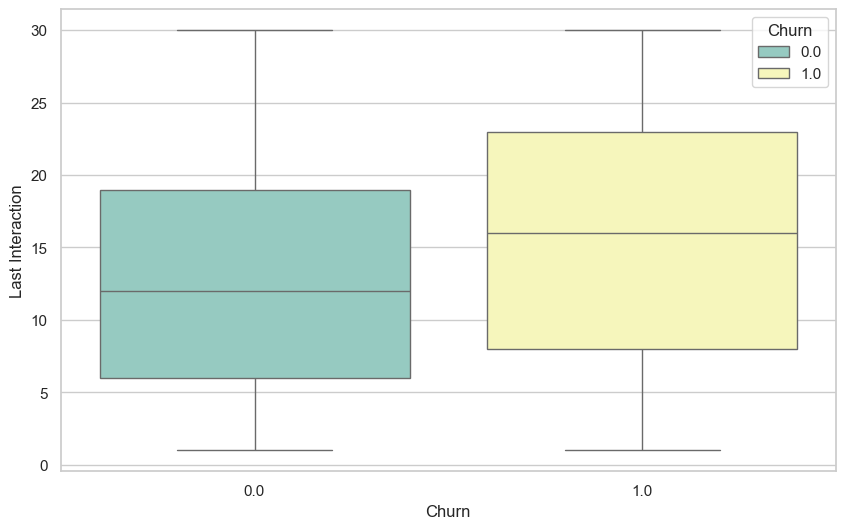

In [13]:
for column in numerical_columns[:-1]:
    sns.boxplot(data=data , x='Churn' , y=column , palette="Set3" , hue='Churn')
    plt.show()

In [14]:
le = LabelEncoder()
for col in data[categorycal_columns]:
    data[col] = le.fit_transform(data[col])

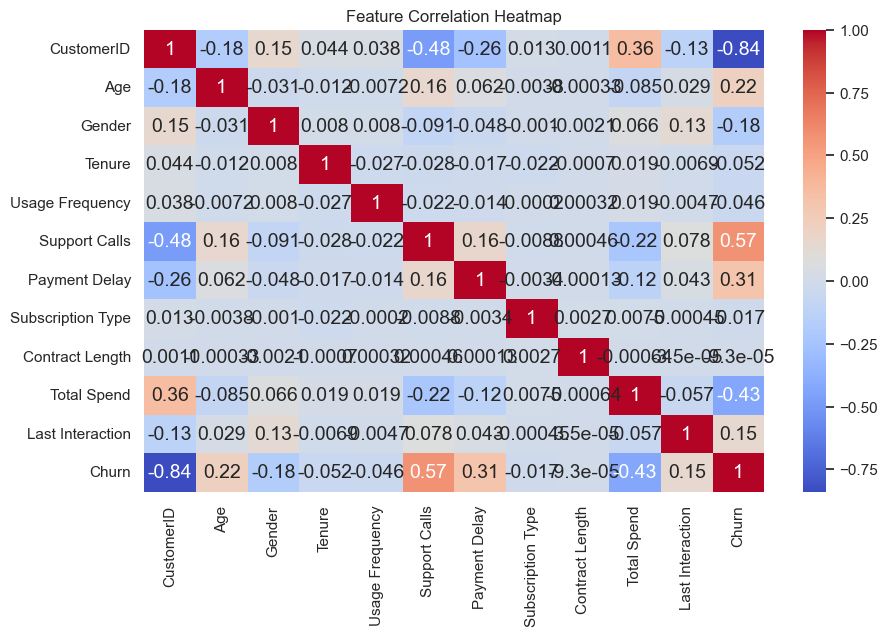

In [15]:
corr = data.corr()
sns.heatmap(corr , annot=True , cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
for column in numerical_columns:
    statistic , p_value = shapiro(data[column])
    print(f'{column} : p_value {p_value:.4f} --> {"Not Normal" if p_value < 0.05 else "Normal"}')

CustomerID : p_value 1.0000 --> Normal
Age : p_value 1.0000 --> Normal
Tenure : p_value 1.0000 --> Normal
Usage Frequency : p_value 1.0000 --> Normal
Support Calls : p_value 1.0000 --> Normal
Payment Delay : p_value 1.0000 --> Normal
Total Spend : p_value 1.0000 --> Normal
Last Interaction : p_value 1.0000 --> Normal
Churn : p_value 1.0000 --> Normal


c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
